# Image Modification Project

In [130]:
# import packages
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as mpl
from PIL import Image
from PIL import ImageFilter

# Webscraping the Image

In [131]:
from urllib.parse import urlparse
import urllib.robotparser

# Checks the robots.txt file (from the Text: web scraping)
def canFetch(url):

    parsed_uri = urlparse(url)
    domain = '{uri.scheme}://{uri.netloc}/'.format(uri=parsed_uri)

    rp = urllib.robotparser.RobotFileParser()
    rp.set_url(domain + "/robots.txt")
    try:
        rp.read()
        canFetchBool = rp.can_fetch("*", url)
    except:
        canFetchBool = None
    
    return canFetchBool

In [132]:
# Checking if image is allowed to be used
url = 'https://cdn.cultofmac.com/wp-content/uploads/2019/01/79D185D7-E5B8-4924-8923-C7A806C66F5D.5a1aab5b433943e7ae124dc780973120.jpeg'
canFetch(url)

True

In [133]:
if canFetch(url):
    image = Image.open(urllib.request.urlopen(url))
display(image) # Displaying image

In [134]:
im_array = np.array(image)

# Compressing image

In [135]:
compressor = 4 # compressing 
im_compressed = np.zeros([int(im_array.shape[0]/compressor),int(im_array.shape[1]/compressor),3]).astype('uint8')
im_compressed.shape
for x in range(im_compressed.shape[0]): #loop through top row
    for y in range(im_compressed.shape[1]): #loop through bottom row
        for z in range(3): #looping through 3D array
            im_compressed[x, y, z] = np.mean(im_array[4*x:4*x+4,4*y:4*y+4,z]).astype('uint8') 
            #finding the average of x, y, z and returns an array, filling im_compressed with corresponding compressed values
# Print large image function for displaying image
def printLargeImage(smallImage,factor):
    maxsize = tuple([factor*x for x in smallImage.size])
    largeImage = smallImage.resize(maxsize)
    display(largeImage)
    return

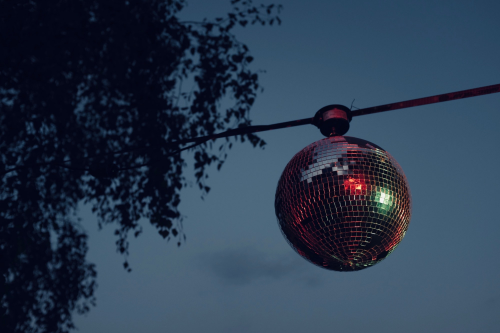

In [136]:
# Displaying Compressed Image
image2 = Image.fromarray(im_compressed)
printLargeImage(image2,1)

# Finding RGB Histograms

In [137]:
%matplotlib notebook
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Fucntion that displays RGB Histograms
def print_RGB_histogram(image_array):
    num_bins = 255

    fig, ax = plt.subplots(3, sharex=True)

    # the histogram of the data
    n, bins, patches = ax[0].hist(image_array[:,:,0].flatten(), num_bins, color="red")
    n, bins, patches = ax[1].hist(image_array[:,:,1].flatten(), num_bins, color="green")
    n, bins, patches = ax[2].hist(image_array[:,:,2].flatten(), num_bins, color="blue")

    plt.show()
print_RGB_histogram(im_array)

<IPython.core.display.Javascript object>

# Making the Image Brighter

In [138]:
bright_pic = im_array * 1.7 # Multiplying array by 1.7
bright_pic = bright_pic.astype('uint8') # Making sure the numbers are intergers
bright_pic_display = Image.fromarray(bright_pic)
display(bright_pic_display) # Displaying new image

# Applying a Red Filter

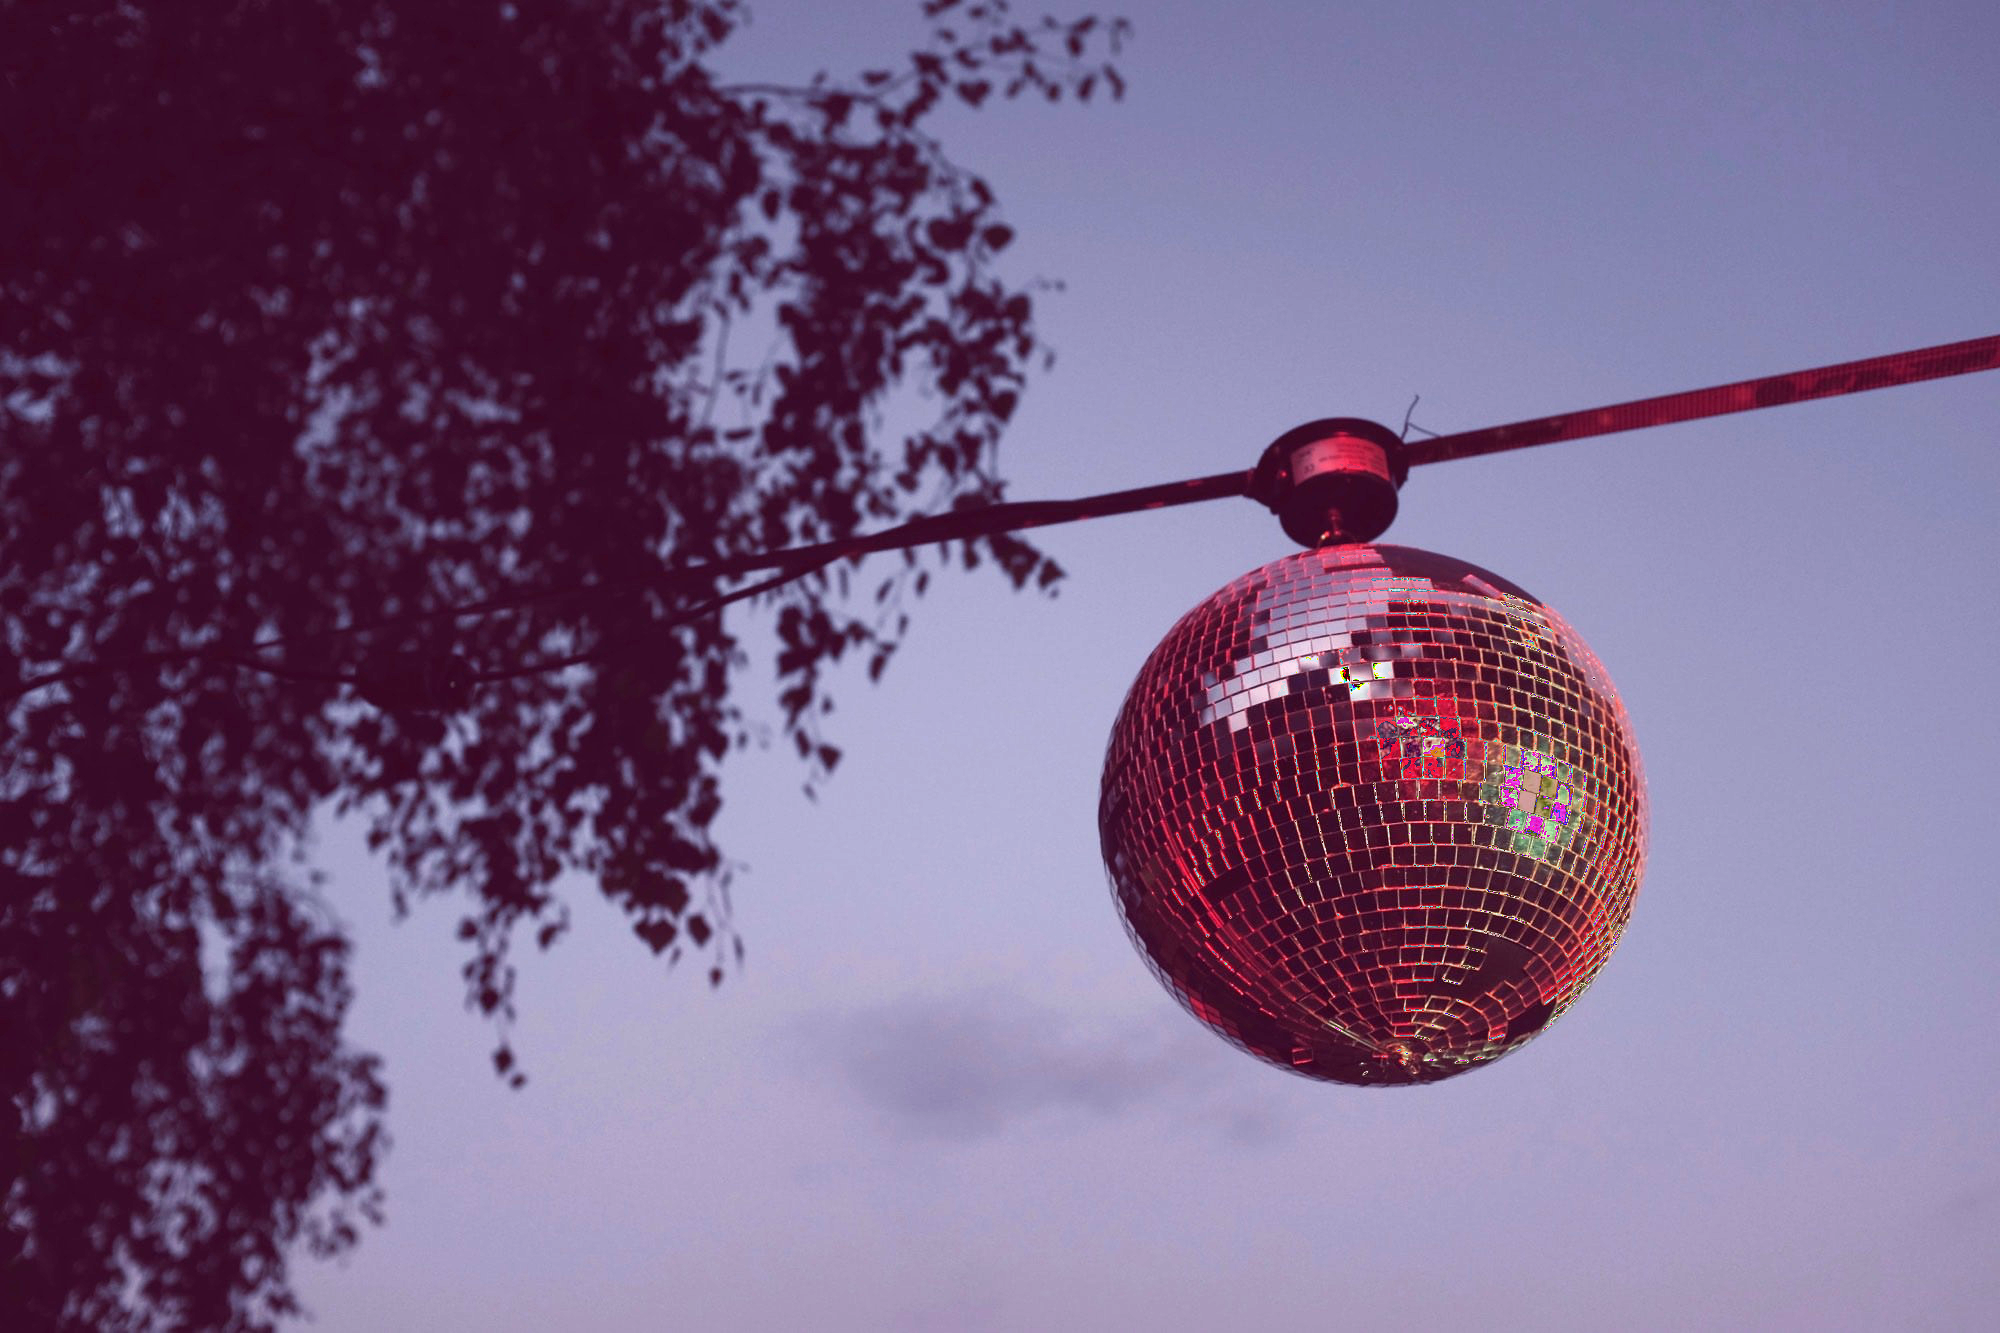

In [139]:
improved_pic = np.array(bright_pic)
for i in range(1333): # Looping through dimensions of image
    for j in range(2000):
        if improved_pic[i, j, 0] <= 205: # Modyfing array to make it red
            improved_pic[i, j, 0] += 50
        else:
            continue
improved_pic_display = Image.fromarray(improved_pic)
display(improved_pic_display)    